In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
dataframe = pandas.read_csv(url, header=-1)

In [3]:
dataframe.groupby(dataframe.columns[-1]).count()

,0,1,2,3,4,5,6,7
8,,,,,,,,
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,15,15,15,15,15,15,15,15
4,57,57,57,57,57,57,57,57
5,115,115,115,115,115,115,115,115
6,259,259,259,259,259,259,259,259
7,391,391,391,391,391,391,391,391
8,568,568,568,568,568,568,568,568
9,689,689,689,689,689,689,689,689


In [4]:
#df = dataframe.drop(dataframe[dataframe.iloc[:,-1] < 9].index)
#df = df.drop(dataframe[dataframe.iloc[:,-1] > 10].index)
#dataframe = dataframe.drop(dataframe[dataframe.iloc[:,-1] > 20])



In [5]:
#df.groupby(df.columns[-1]).count()

In [6]:
#ONE-HOT ENCODING
dumm = pandas.get_dummies(dataframe, prefix=None, prefix_sep='_', dummy_na=False, columns=[0,8], sparse=False, drop_first=False)

y = dumm.as_matrix(columns=dumm.columns[-28:])
X = dumm.as_matrix(columns=dumm.columns[:-28])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
print(y.shape)

(4177, 28)


In [8]:
%run -i lib/functions
%run -i lib/infrastructure

In [9]:
net = NeuralNet(X.shape[1], y.shape[1])

input_layer = InputLayer(input_size=X.shape[1])
first_layer = Layer(HyperbolicTangent, out_size=25)
second_layer = Layer(ReLU, out_size=19)
out_layer = OutputLayer(SoftMax, y.shape[1], CrossEntropy)

input_to_first_connection = Connection(input_layer, X.shape[1], 25)
first_layer.add_connection(input_to_first_connection)

first_to_second_connection = Connection(first_layer, 25, 19)
second_layer.add_connection(first_to_second_connection)

second_to_third_connection = Connection(second_layer, 19, y.shape[1])
input_to_third_connection = Connection(input_layer, X.shape[1], y.shape[1])
out_layer.add_connection(second_to_third_connection)
out_layer.add_connection(input_to_third_connection)


net.add_layer(input_layer)
net.add_layer(first_layer)
net.add_layer(second_layer)
net.add_layer(out_layer)

In [10]:
errors = net.train(X_train, y_train, 1000, 0.002, 55)


Epoch: 0; Error: 246.33344468410812;
Epoch: 1; Error: 235.54736595922472;
Epoch: 2; Error: 229.58584260518415;
Epoch: 3; Error: 225.80217277035666;
Epoch: 4; Error: 223.2265765116449;
Epoch: 5; Error: 221.3435488790749;
Epoch: 6; Error: 219.88284858427423;
Epoch: 7; Error: 218.6905436174804;
Epoch: 8; Error: 217.71091215558133;
Epoch: 9; Error: 216.84646244564166;
Epoch: 10; Error: 216.08717161680053;
Epoch: 11; Error: 215.43611177709218;
Epoch: 12; Error: 214.8479632648312;
Epoch: 13; Error: 214.31973273989823;
Epoch: 14; Error: 213.84584141688538;
Epoch: 15; Error: 213.40489422023512;
Epoch: 16; Error: 212.9737865978666;
Epoch: 17; Error: 212.5786772347582;
Epoch: 18; Error: 212.21598580659742;
Epoch: 19; Error: 211.84544713274587;
Epoch: 20; Error: 211.47728682196043;
Epoch: 21; Error: 211.17696172517557;
Epoch: 22; Error: 210.86271820728422;
Epoch: 23; Error: 210.50875638497547;
Epoch: 24; Error: 210.15688334458014;
Epoch: 25; Error: 209.82818394886922;
Epoch: 26; Error: 209.473887

Epoch: 218; Error: 188.1932804892442;
Epoch: 219; Error: 188.17254682241793;
Epoch: 220; Error: 188.14176623602495;
Epoch: 221; Error: 188.12648010443786;
Epoch: 222; Error: 188.09169369024409;
Epoch: 223; Error: 188.07444619087377;
Epoch: 224; Error: 188.0556667363566;
Epoch: 225; Error: 188.0304653385358;
Epoch: 226; Error: 188.00306466889631;
Epoch: 227; Error: 187.982424317435;
Epoch: 228; Error: 187.96084899668412;
Epoch: 229; Error: 187.9216747113753;
Epoch: 230; Error: 187.89765742791226;
Epoch: 231; Error: 187.87820668261975;
Epoch: 232; Error: 187.85918491129664;
Epoch: 233; Error: 187.8391216171647;
Epoch: 234; Error: 187.81599518922363;
Epoch: 235; Error: 187.80400186051762;
Epoch: 236; Error: 187.77151677898195;
Epoch: 237; Error: 187.74216332091444;
Epoch: 238; Error: 187.72103569388443;
Epoch: 239; Error: 187.68857247886416;
Epoch: 240; Error: 187.66403920621661;
Epoch: 241; Error: 187.524793436495;
Epoch: 242; Error: 187.50542112612135;
Epoch: 243; Error: 187.46977384245

Epoch: 433; Error: 185.10537565959606;
Epoch: 434; Error: 185.66458294658878;
Epoch: 435; Error: 185.1029859543708;
Epoch: 436; Error: 185.06938486300675;
Epoch: 437; Error: 185.6240715975941;
Epoch: 438; Error: 185.06960212425244;
Epoch: 439; Error: 185.67299346356546;
Epoch: 440; Error: 185.66577025800134;
Epoch: 441; Error: 185.07905564087358;
Epoch: 442; Error: 185.64238731871654;
Epoch: 443; Error: 185.64614302246204;
Epoch: 444; Error: 185.05742661934886;
Epoch: 445; Error: 185.59667745027173;
Epoch: 446; Error: 185.59546284509784;
Epoch: 447; Error: 185.58203351535295;
Epoch: 448; Error: 185.5763362730752;
Epoch: 449; Error: 185.5687631010284;
Epoch: 450; Error: 185.58293477794047;
Epoch: 451; Error: 185.58639076587966;
Epoch: 452; Error: 185.56173498481004;
Epoch: 453; Error: 185.53654520911877;
Epoch: 454; Error: 185.55038316981623;
Epoch: 455; Error: 185.5772182622727;
Epoch: 456; Error: 185.5344915930985;
Epoch: 457; Error: 185.53528172432007;
Epoch: 458; Error: 184.95007119

Epoch: 649; Error: 183.73868377289278;
Epoch: 650; Error: 183.7253279194681;
Epoch: 651; Error: 183.67738903809567;
Epoch: 652; Error: 183.72008118872003;
Epoch: 653; Error: 184.56437353995017;
Epoch: 654; Error: 183.70309878499552;
Epoch: 655; Error: 183.6306785141218;
Epoch: 656; Error: 183.7400000588453;
Epoch: 657; Error: 183.60676572968535;
Epoch: 658; Error: 183.639671909112;
Epoch: 659; Error: 184.41352855247973;
Epoch: 660; Error: 183.58763429679377;
Epoch: 661; Error: 183.5644185513284;
Epoch: 662; Error: 183.54560362602598;
Epoch: 663; Error: 183.61790698021127;
Epoch: 664; Error: 183.6338409991052;
Epoch: 665; Error: 183.5874150023316;
Epoch: 666; Error: 183.59305100701292;
Epoch: 667; Error: 183.62123720347796;
Epoch: 668; Error: 183.64580462175624;
Epoch: 669; Error: 184.3411972343344;
Epoch: 670; Error: 183.52037980618107;
Epoch: 671; Error: 183.5130341375134;
Epoch: 672; Error: 183.56405722166306;
Epoch: 673; Error: 183.5705479675893;
Epoch: 674; Error: 183.5923332315476

Epoch: 863; Error: 182.40626117872065;
Epoch: 864; Error: 183.2360165920695;
Epoch: 865; Error: 183.19257366841254;
Epoch: 866; Error: 183.04188583041827;
Epoch: 867; Error: 183.1271833366764;
Epoch: 868; Error: 183.01086596911122;
Epoch: 869; Error: 182.38560594782612;
Epoch: 870; Error: 183.2566257290216;
Epoch: 871; Error: 183.1106259678054;
Epoch: 872; Error: 183.21574022448561;
Epoch: 873; Error: 183.08449742273447;
Epoch: 874; Error: 182.39379264030063;
Epoch: 875; Error: 183.09405227746703;
Epoch: 876; Error: 182.93153374008097;
Epoch: 877; Error: 183.00204201960292;
Epoch: 878; Error: 182.9918975358165;
Epoch: 879; Error: 183.063716447454;
Epoch: 880; Error: 182.95868761830891;
Epoch: 881; Error: 183.01844646374914;
Epoch: 882; Error: 183.03199711332582;
Epoch: 883; Error: 182.30243946461354;
Epoch: 884; Error: 182.8405383985785;
Epoch: 885; Error: 182.21402036537796;
Epoch: 886; Error: 183.08344054173546;
Epoch: 887; Error: 182.94592780033358;
Epoch: 888; Error: 182.9444359511

In [12]:
prediction = net.predict(X_test).T
print(net.get_accuracy(prediction, y_test))

0.27411167512690354


In [13]:
epochs_num = 10

batches = [10,40,70]
learning_rates = [0.01, 0.005, 0.001]

batches = [20,30,40,60]
learning_rates = [0.0001,0.001,0.005,0.002]

results = dict()

results['batches'] = []
results['rates'] = []

for batch in batches:
    results['batches'].append(net.train(X_train, y_train, epochs_num, 0.01, batch, False))
        
for rate in learning_rates:
    results['rates'].append(net.train(X_train, y_train, epochs_num, rate, 40, False ))
        

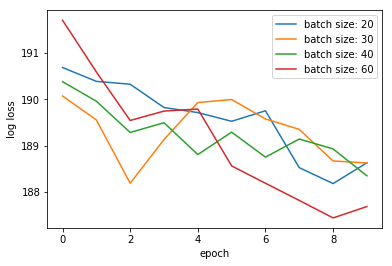

In [14]:
experiments_with_batch = results['batches']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_batch:
     ax.plot(experiment['epoch'], experiment['log_loss'], label=experiment['batch_size']);

plt.ylabel('log loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

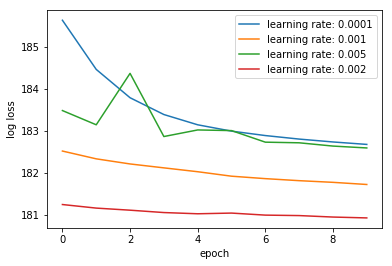

In [15]:
experiments_with_rates = results['rates']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_rates:
    ax.plot(experiment['epoch'], experiment['log_loss'], label=experiment['learning_rate']);

plt.ylabel('log loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

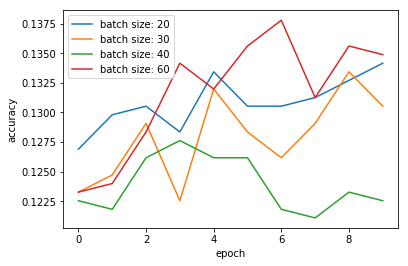

In [16]:
experiments_with_batch = results['batches']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_batch:
     ax.plot(experiment['epoch'], experiment['accuracy'], label=experiment['batch_size']);

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


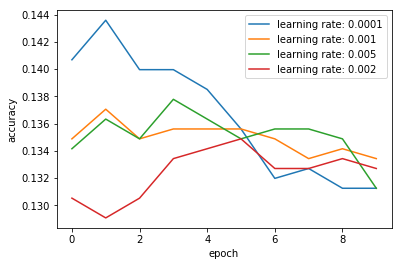

In [17]:
experiments_with_batch = results['rates']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_batch:
     ax.plot(experiment['epoch'], experiment['accuracy'], label=experiment['learning_rate']);

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [18]:
net_t = NeuralNet(X.shape[1], y.shape[1])

input_layer = InputLayer(input_size=X.shape[1])
first_layer = Layer(HyperbolicTangent, out_size=25)
second_layer = Layer(ReLU, out_size=19)
out_layer = OutputLayer(HyperbolicTangent, y.shape[1], CrossEntropy)

input_to_first_connection = Connection(input_layer, X.shape[1], 25)
first_layer.add_connection(input_to_first_connection)

first_to_second_connection = Connection(first_layer, 25, 19)
second_layer.add_connection(first_to_second_connection)

second_to_third_connection = Connection(second_layer, 19, y.shape[1])
input_to_third_connection = Connection(input_layer, X.shape[1], y.shape[1])
out_layer.add_connection(second_to_third_connection)
out_layer.add_connection(input_to_third_connection)


net_t.add_layer(input_layer)
net_t.add_layer(first_layer)
net_t.add_layer(second_layer)
net_t.add_layer(out_layer)

In [21]:
errors = net_t.train(X_train, y_train, 1000, 0.002, 55)

Epoch: 0; Error: nan;
Epoch: 1; Error: nan;
Epoch: 2; Error: nan;
Epoch: 3; Error: nan;
Epoch: 4; Error: nan;
Epoch: 5; Error: nan;
Epoch: 6; Error: nan;
Epoch: 7; Error: nan;
Epoch: 8; Error: nan;
Epoch: 9; Error: nan;
Epoch: 10; Error: nan;
Epoch: 11; Error: nan;
Epoch: 12; Error: nan;
Epoch: 13; Error: nan;
Epoch: 14; Error: nan;
Epoch: 15; Error: nan;
Epoch: 16; Error: nan;
Epoch: 17; Error: nan;
Epoch: 18; Error: nan;
Epoch: 19; Error: nan;
Epoch: 20; Error: nan;
Epoch: 21; Error: nan;
Epoch: 22; Error: nan;
Epoch: 23; Error: nan;
Epoch: 24; Error: nan;
Epoch: 25; Error: nan;
Epoch: 26; Error: nan;
Epoch: 27; Error: nan;
Epoch: 28; Error: nan;
Epoch: 29; Error: nan;
Epoch: 30; Error: nan;
Epoch: 31; Error: nan;
Epoch: 32; Error: nan;
Epoch: 33; Error: nan;
Epoch: 34; Error: nan;
Epoch: 35; Error: nan;
Epoch: 36; Error: nan;
Epoch: 37; Error: nan;
Epoch: 38; Error: nan;
Epoch: 39; Error: nan;
Epoch: 40; Error: nan;
Epoch: 41; Error: nan;
Epoch: 42; Error: nan;
Epoch: 43; Error: nan

Epoch: 347; Error: nan;
Epoch: 348; Error: nan;
Epoch: 349; Error: nan;
Epoch: 350; Error: nan;
Epoch: 351; Error: nan;
Epoch: 352; Error: nan;
Epoch: 353; Error: nan;
Epoch: 354; Error: nan;
Epoch: 355; Error: nan;
Epoch: 356; Error: nan;
Epoch: 357; Error: nan;
Epoch: 358; Error: nan;
Epoch: 359; Error: nan;
Epoch: 360; Error: nan;
Epoch: 361; Error: nan;
Epoch: 362; Error: nan;
Epoch: 363; Error: nan;
Epoch: 364; Error: nan;
Epoch: 365; Error: nan;
Epoch: 366; Error: nan;
Epoch: 367; Error: nan;
Epoch: 368; Error: nan;
Epoch: 369; Error: nan;
Epoch: 370; Error: nan;
Epoch: 371; Error: nan;
Epoch: 372; Error: nan;
Epoch: 373; Error: nan;
Epoch: 374; Error: nan;
Epoch: 375; Error: nan;
Epoch: 376; Error: nan;
Epoch: 377; Error: nan;
Epoch: 378; Error: nan;
Epoch: 379; Error: nan;
Epoch: 380; Error: nan;
Epoch: 381; Error: nan;
Epoch: 382; Error: nan;
Epoch: 383; Error: nan;
Epoch: 384; Error: nan;
Epoch: 385; Error: nan;
Epoch: 386; Error: nan;
Epoch: 387; Error: nan;
Epoch: 388; Erro

Epoch: 690; Error: nan;
Epoch: 691; Error: nan;
Epoch: 692; Error: nan;
Epoch: 693; Error: nan;
Epoch: 694; Error: nan;
Epoch: 695; Error: nan;
Epoch: 696; Error: nan;
Epoch: 697; Error: nan;
Epoch: 698; Error: nan;
Epoch: 699; Error: nan;
Epoch: 700; Error: nan;
Epoch: 701; Error: nan;
Epoch: 702; Error: nan;
Epoch: 703; Error: nan;
Epoch: 704; Error: nan;
Epoch: 705; Error: nan;
Epoch: 706; Error: nan;
Epoch: 707; Error: nan;
Epoch: 708; Error: nan;
Epoch: 709; Error: nan;
Epoch: 710; Error: nan;
Epoch: 711; Error: nan;
Epoch: 712; Error: nan;
Epoch: 713; Error: nan;
Epoch: 714; Error: nan;
Epoch: 715; Error: nan;
Epoch: 716; Error: nan;
Epoch: 717; Error: nan;
Epoch: 718; Error: nan;
Epoch: 719; Error: nan;
Epoch: 720; Error: nan;
Epoch: 721; Error: nan;
Epoch: 722; Error: nan;
Epoch: 723; Error: nan;
Epoch: 724; Error: nan;
Epoch: 725; Error: nan;
Epoch: 726; Error: nan;
Epoch: 727; Error: nan;
Epoch: 728; Error: nan;
Epoch: 729; Error: nan;
Epoch: 730; Error: nan;
Epoch: 731; Erro

In [23]:
predict_tanh = net_t.predict(X_test).T
print(net_t.get_accuracy(predict_tanh, y_test))

0.24075416968817984
